Ceci est notre projet.

In [1]:
import numpy as np
import numpy.random as rnd
import itertools
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib ipympl

Initialize the classes

In [56]:


class Bird:
    """A configuration of bird parameters"""

    def __init__(self, X, Y, theta, V):
        self.X = X
        self.Y = Y
        self.theta = theta
        self.velocity = V
    




    def get_neighbors(self, swarm, R):
        "get the neighbors of a bird, including itself"

        neighbors = []
        for bird in swarm:
            if np.sqrt((self.X - bird.X)**2 + (self.Y - bird.Y)**2) <= R:
                neighbors.append(bird)
        return neighbors
    
    def get_mean_theta(self, neighbors):
        "get the average theta of the neighbors, according to the formula in the paper"

        thetas = [bird.theta for bird in neighbors]
        mean = np.mean(np.sin(thetas))/np.mean(np.cos(thetas))
        return np.arctan(mean)

    # def evolve(self, dt):
    #     "get the new position of the bird"

    #     self.X += self.velocity * np.cos(self.theta) * dt
    #     self.Y += self.velocity * np.sin(self.theta) * dt
    #     self.theta += self.get_mean_theta(self.get_neighbors(swarm, R)) * dt
    
class Swarm :
    "Creats the swarm state with many birds"

    def __init__(self, L, N, V, eta, radius):
        self.length = L
        self.number = N
        self.velocity_norm = V
        self.eta = eta
        self.interaction_radius = radius

        self.dt = 1
        self.rho = N/(L**2)
        self.birds = []

    def initialize(self):
        "initialize the swarm with random positions and velocities"

        for i in range(self.number):
            X = rnd.uniform(0, self.length)
            Y = rnd.uniform(0, self.length)
            theta = rnd.uniform(0, 2*np.pi)
            self.birds.append(Bird(X, Y, theta, self.velocity_norm))

    def get_swarm_mean_velocity(self):
        "get the mean vectorial velocity of the swarm, which is the order parameter"

        mean_vx = np.mean([bird.velocity * np.cos(bird.theta) for bird in self.birds])
        mean_vy = np.mean([bird.velocity * np.sin(bird.theta) for bird in self.birds])

        return np.sqrt(mean_vx**2 + mean_vy**2)/self.velocity_norm

    def evolve(self):
        "evolve the swarm"
        
        update = []

        for bird in self.birds:
            new_X = bird.X + bird.velocity * np.cos(bird.theta) * self.dt    # birds are indistinguishable, so it doesn't matter which way the list goes
            new_Y = bird.Y + bird.velocity * np.sin(bird.theta) * self.dt

            #if the bird is out of the box, it comes back from the other side
            if new_X > self.length:
                new_X -= self.length
            elif new_X < 0:
                new_X += self.length

            if new_Y > self.length:
                new_Y -= self.length
            elif new_Y < 0:
                new_Y += self.length

            random_theta = np.random.uniform(-self.eta/2, self.eta/2)
            new_theta = random_theta + bird.get_mean_theta(bird.get_neighbors(self.birds, self.interaction_radius))

            update.append([new_X, new_Y, new_theta])
        
        #enumerate self.birds to apply the update
        for i, bird in enumerate(self.birds):
            bird.X = update[i][0]
            bird.Y = update[i][1]
            bird.theta = update[i][2]



Init

In [76]:
#create swarm of birds and do an animation of the evolution
L = 25
N = 300
V = 0.03
eta = np.pi/4
interaction_radius = 1
swarm = Swarm(L, N, V, eta, interaction_radius)
swarm.initialize()

Result

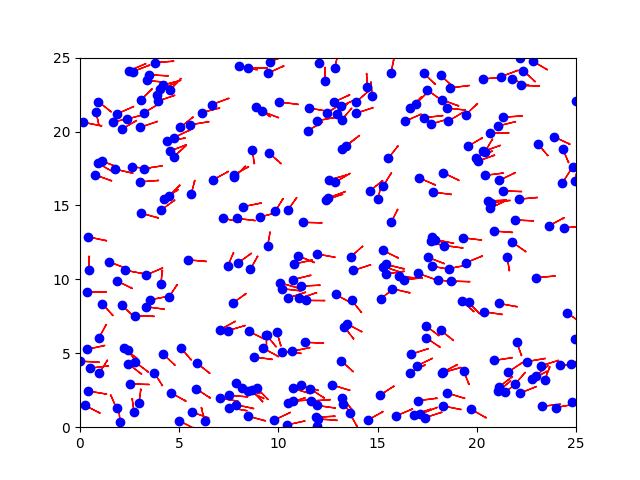

In [78]:

it = 20
# Create the figure and axis for the plot
fig, ax = plt.subplots()

# Plot the initial positions of the birds as points


# Add arrows to represent the direction of each bird
# arrows = []
# for bird in swarm.birds:
#     arrow = ax.arrow(bird.X, bird.Y, 0.2 * np.cos(bird.theta), 0.2 * np.sin(bird.theta),
#                      head_width=0.05, head_length=0.1, fc='red', ec='red')
#     arrows.append(arrow)



# Set the axis limits
ax.set_xlim(0, L)
ax.set_ylim(0, L)

velocities = []

for i in range(it):

    

    # if i >=it-20:
    #     #store the velocity of each bird in velocities
    #     velocities.append([bird.theta for bird in swarm.birds])
    
    velocities.append([bird.theta for bird in swarm.birds])



    swarm.evolve()

arrows = []
for k,bird in enumerate(swarm.birds):
    # arrow = ax.arrow(bird.X, bird.Y, 0.035*L*np.cos(np.mean([vel[k] for vel in velocities])),0.035*L*np.sin(np.mean([vel[k] for vel in velocities])),
    #                 head_width=0.05, head_length=0.1, fc='red', ec='red')
    arrow = ax.arrow(bird.X, bird.Y, 0.035*L*np.cos(velocities[0][k]),0.035*L*np.sin(np.mean(velocities[0][k])), head_width=0.05, head_length=0.1, fc='red', ec='red')
    arrows.append(arrow)

points, = ax.plot([bird.X for bird in swarm.birds], [bird.Y for bird in swarm.birds], 'bo')
# Create the animation
#animation = FuncAnimation(fig, update, frames=range(100), interval=100)

# Show the animation
plt.show()
